<a href="https://colab.research.google.com/github/atmdatascience/python/blob/main/colab/Visualizaciones_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

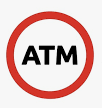

#Gráficos de la encuesta

## Modulos

In [1]:
import pandas as pd
import numpy as np

## Fuente de datos

In [2]:
url = "https://raw.githubusercontent.com/atmdatascience/python/main/datasets/encuestasweb/"

In [3]:
archivo2021 = "Encuestas-2021-Tramite-web.csv"

In [4]:
archivo2020 = "Encuestas-2020-Tramite-web.csv"

## Creación del dataframe

In [5]:
encuesta = pd.read_csv(url+archivo2020)

## Visualización del dataframe

In [6]:
encuesta

,Marca temporal,1. Utiliza habitualmente la página web de ATM,2. Le resultó simple la creación de su cuenta en Mis Trámites,3. Le resulta comprensible la sección de Mis Trámites,4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:,5. La información brindada por la página web de ATM es:,6. El boleto para pagar el año 2020 lo obtuvo por:,Agregue aquí su sugerencia
0,31/12/2020 17:38:37,SI,SI,NO,Poco satisfactoria,Regular,Descarga de la página web de ATM,NaN
1,31/12/2020 16:29:17,SI,SI,SI,Muy satisfactoria,Muy Buena,Descarga de la página web de ATM,NaN
2,31/12/2020 15:33:54,SI,SI,SI,Nada satisfactoria,Mala,Descarga de la página web de ATM,DESDE LA ACTIVIDAD PROFESIONAL COMPLICARON MUC...
3,31/12/2020 15:22:19,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN
4,31/12/2020 12:10:19,SI,NO,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN
...,...,...,...,...,...,...,...,...
1137,6/11/2020 11:23:38,SI,SI,SI,Nada satisfactoria,Regular,Descarga de la página web de ATM,NaN
1138,6/11/2020 11:21:25,NO,SI,SI,Satisfactoria,Buena,Recepción por correo electrónico,Siempre agregar toda la informacion que se pue...
1139,6/11/2020 11:21:11,NO,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN
1140,6/11/2020 11:21:00,NO,SI,SI,Muy satisfactoria,Buena,Descarga de la página web de ATM,NaN


In [7]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 8 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Marca temporal                                                           1142 non-null   object
 1   1. Utiliza habitualmente la página web de ATM                            1142 non-null   object
 2   2. Le resultó simple la creación de su cuenta en Mis Trámites            1142 non-null   object
 3   3. Le resulta comprensible la sección de Mis Trámites                    1142 non-null   object
 4   4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:  1142 non-null   object
 5   5. La información brindada por la página web de ATM es:                  1140 non-null   object
 6   6. El boleto para pagar el año 2020 lo obtuvo por:                       1142 non

## Limpieza y transformación de datos

In [8]:
encuesta.rename(columns={"Marca temporal":"Fecha"}, inplace=True) # "Marca temporal"
encuesta.rename(columns={"1. Utiliza habitualmente la página web de ATM":"P1"}, inplace=True) # "1. Utiliza habitualmente la página web de ATM"
encuesta.rename(columns={"2. Le resultó simple la creación de su cuenta en Mis Trámites":"P2"}, inplace=True) # "2. Le resultó simple la creación de su cuenta en Mis Trámites""
encuesta.rename(columns={"3. Le resulta comprensible la sección de Mis Trámites":"P3"}, inplace=True) # "3. Le resulta comprensible la sección de Mis Trámites"
encuesta.rename(columns={"4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:":"P4"}, inplace=True) # "4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:"
encuesta.rename(columns={"5. La información brindada por la página web de ATM es:":"P5"}, inplace=True) # "5. La información brindada por la página web de ATM es:"
encuesta.rename(columns={"6. El boleto para pagar el año 2020 lo obtuvo por:":"P6"}, inplace=True) # "6. El boleto para pagar el año 2021 lo obtiene por:"
encuesta.rename(columns={"Agregue aquí su sugerencia":"P7"}, inplace=True) # "Agregue aquí su sugerencia"

In [9]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   1142 non-null   object
 1   P1      1142 non-null   object
 2   P2      1142 non-null   object
 3   P3      1142 non-null   object
 4   P4      1142 non-null   object
 5   P5      1140 non-null   object
 6   P6      1142 non-null   object
 7   P7      436 non-null    object
dtypes: object(8)
memory usage: 71.5+ KB


In [10]:
encuesta.drop(columns=["P7"], inplace=True)

In [11]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   1142 non-null   object
 1   P1      1142 non-null   object
 2   P2      1142 non-null   object
 3   P3      1142 non-null   object
 4   P4      1142 non-null   object
 5   P5      1140 non-null   object
 6   P6      1142 non-null   object
dtypes: object(7)
memory usage: 62.6+ KB


In [12]:
encuesta["Fecha"] = pd.DatetimeIndex(encuesta["Fecha"])

In [13]:
encuesta.insert(1,column="Meses",value=pd.DatetimeIndex(encuesta["Fecha"]).month_name())
encuesta.insert(2,column="Dias",value=pd.DatetimeIndex(encuesta["Fecha"]).day_name())
encuesta.insert(3,column="Hora",value=pd.DatetimeIndex(encuesta["Fecha"]).hour)

In [14]:
encuesta.Meses = encuesta.Meses.astype(str).str.replace("January","Enero")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("February","Febrero")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("March","Marzo")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("April","Abril")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("May","Mayo")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("June","Junio")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("July","Julio")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("February","Agosto")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("September","Setiembre")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("October","Octubre")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("November","Noviembre")
encuesta.Meses = encuesta.Meses.astype(str).str.replace("December","Diciembre")

In [15]:
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Monday","Lunes")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Tuesday","Martes")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Wednesday","Miercoles")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Thursday","Jueves")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Friday","Viernes")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Saturday","Sabado")
encuesta.Dias = encuesta.Dias.astype(str).str.replace("Sunday","Domingo")

In [16]:
encuesta["Encuestas"] = 1

In [17]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      1142 non-null   datetime64[ns]
 1   Meses      1142 non-null   object        
 2   Dias       1142 non-null   object        
 3   Hora       1142 non-null   int64         
 4   P1         1142 non-null   object        
 5   P2         1142 non-null   object        
 6   P3         1142 non-null   object        
 7   P4         1142 non-null   object        
 8   P5         1140 non-null   object        
 9   P6         1142 non-null   object        
 10  Encuestas  1142 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 98.3+ KB


In [18]:
encuesta.head()

,Fecha,Meses,Dias,Hora,P1,P2,P3,P4,P5,P6,Encuestas
0,2020-12-31 17:38:37,Diciembre,Jueves,17,SI,SI,NO,Poco satisfactoria,Regular,Descarga de la página web de ATM,1
1,2020-12-31 16:29:17,Diciembre,Jueves,16,SI,SI,SI,Muy satisfactoria,Muy Buena,Descarga de la página web de ATM,1
2,2020-12-31 15:33:54,Diciembre,Jueves,15,SI,SI,SI,Nada satisfactoria,Mala,Descarga de la página web de ATM,1
3,2020-12-31 15:22:19,Diciembre,Jueves,15,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,1
4,2020-12-31 12:10:19,Diciembre,Jueves,12,SI,NO,SI,Satisfactoria,Buena,Descarga de la página web de ATM,1


# Visualizaciones

In [19]:
import plotly.express as px
import plotly.graph_objects as go

## Graficos de Barra

### Grafico de Barras por Mes

#### Agrupacion de los datos

In [20]:
Meses = encuesta.groupby("Meses", as_index=False, sort=False).count()
Meses

,Meses,Fecha,Dias,Hora,P1,P2,P3,P4,P5,P6,Encuestas
0,Diciembre,404,404,404,404,404,404,404,404,404,404
1,Noviembre,501,501,501,501,501,501,501,499,501,501
2,Octubre,37,37,37,37,37,37,37,37,37,37
3,Setiembre,28,28,28,28,28,28,28,28,28,28
4,Mayo,7,7,7,7,7,7,7,7,7,7
5,Abril,30,30,30,30,30,30,30,30,30,30
6,Marzo,37,37,37,37,37,37,37,37,37,37
7,Febrero,40,40,40,40,40,40,40,40,40,40
8,Enero,54,54,54,54,54,54,54,54,54,54
9,Junio,4,4,4,4,4,4,4,4,4,4


#### Grafico

In [21]:
fig = px.bar(Meses, 
             x="Meses", 
             y="Encuestas", 
             color="Meses", 
             title="Encuestas realizadas por mes")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])
fig.show()

In [22]:
fig = px.bar(Meses, x="Meses", y="Encuestas", title="Encuestas realizadas por mes")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])
fig.show()

### Grafico de Barras por Hora

#### Agrupacion de los datos

In [23]:
Horas = encuesta.groupby("Hora", as_index=False).count()
Horas

,Hora,Fecha,Meses,Dias,P1,P2,P3,P4,P5,P6,Encuestas
0,0,11,11,11,11,11,11,11,11,11,11
1,1,3,3,3,3,3,3,3,3,3,3
2,3,1,1,1,1,1,1,1,1,1,1
3,7,7,7,7,7,7,7,7,7,7,7
4,8,56,56,56,56,56,56,56,55,56,56
5,9,90,90,90,90,90,90,90,90,90,90
6,10,126,126,126,126,126,126,126,126,126,126
7,11,146,146,146,146,146,146,146,146,146,146
8,12,120,120,120,120,120,120,120,120,120,120
9,13,102,102,102,102,102,102,102,102,102,102


#### Grafico

In [24]:
fig = px.bar(Horas, x="Hora", y="Encuestas", title="Encuestas realizadas por hora en el día")
fig.update_xaxes(type="category")
fig.show()

### Grafico de Barras por Dia de la Semana

#### Agrupacion de los datos

In [25]:
Dias = encuesta.groupby("Dias", as_index=False, sort=False).count()
Dias

,Dias,Fecha,Meses,Hora,P1,P2,P3,P4,P5,P6,Encuestas
0,Jueves,232,232,232,232,232,232,232,232,232,232
1,Miercoles,199,199,199,199,199,199,199,199,199,199
2,Martes,187,187,187,187,187,187,187,186,187,187
3,Lunes,254,254,254,254,254,254,254,254,254,254
4,Domingo,97,97,97,97,97,97,97,97,97,97
5,Sabado,50,50,50,50,50,50,50,49,50,50
6,Viernes,123,123,123,123,123,123,123,123,123,123


#### Grafico

In [26]:
fig = px.bar(Dias, 
             x="Dias", 
             y="Encuestas", 
             title="Encuestas realizadas por día de la semana")

fig.update_xaxes(categoryorder="array", categoryarray= ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"])
fig.show()

### Grafico de Barras Pregunta 1 por Mes

¿Utiliza habitualmente la página web de ATM?

#### Agrupacion de los datos

In [27]:
MesesP1 = encuesta.groupby(["Meses","P1"], as_index=False, sort=False).count()
MesesP1

,Meses,P1,Fecha,Dias,Hora,P2,P3,P4,P5,P6,Encuestas
0,Diciembre,SI,343,343,343,343,343,343,343,343,343
1,Diciembre,NO,61,61,61,61,61,61,61,61,61
2,Noviembre,SI,413,413,413,413,413,413,411,413,413
3,Noviembre,NO,88,88,88,88,88,88,88,88,88
4,Octubre,SI,31,31,31,31,31,31,31,31,31
5,Octubre,NO,6,6,6,6,6,6,6,6,6
6,Setiembre,NO,8,8,8,8,8,8,8,8,8
7,Setiembre,SI,20,20,20,20,20,20,20,20,20
8,Mayo,SI,6,6,6,6,6,6,6,6,6
9,Mayo,NO,1,1,1,1,1,1,1,1,1


#### Grafico

In [28]:
fig = px.bar(MesesP1, x="Meses", y="Encuestas", color="P1", title="¿Utiliza habitualmente la página web de ATM?")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])

fig.show()

In [29]:
fig = px.bar(MesesP1, x="Meses", y="Encuestas", color="P1", title="¿Utiliza habitualmente la página web de ATM?", barmode="group")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])

fig.show()

### Grafico de Barras Pregunta 2 por Mes

¿Le resultó simple la creación de su cuenta en Mis Trámites?

#### Agrupacion de los datos

In [30]:
MesesP2 = encuesta.groupby(["Meses","P2"], as_index=False, sort=False).count()
MesesP2

,Meses,P2,Fecha,Dias,Hora,P1,P3,P4,P5,P6,Encuestas
0,Diciembre,SI,371,371,371,371,371,371,371,371,371
1,Diciembre,NO,33,33,33,33,33,33,33,33,33
2,Noviembre,SI,455,455,455,455,455,455,453,455,455
3,Noviembre,NO,46,46,46,46,46,46,46,46,46
4,Octubre,SI,37,37,37,37,37,37,37,37,37
5,Setiembre,SI,23,23,23,23,23,23,23,23,23
6,Setiembre,NO,5,5,5,5,5,5,5,5,5
7,Mayo,SI,6,6,6,6,6,6,6,6,6
8,Mayo,NO,1,1,1,1,1,1,1,1,1
9,Abril,SI,27,27,27,27,27,27,27,27,27


#### Grafico

In [31]:
fig = px.bar(MesesP2, 
             x="Meses", 
             y="Encuestas", 
             color="P2", 
             title="¿Le resultó simple la creación de su cuenta en Mis Trámites?")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])

fig.show()

In [32]:
fig = px.bar(MesesP2, 
             x="Meses", 
             y="Encuestas", 
             color="P2", 
             title="¿Le resultó simple la creación de su cuenta en Mis Trámites?",
             barmode="group")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])

fig.show()

### Grafico de Barras Pregunta 3 por Mes

¿Le resulta comprensible la sección de Mis Trámites?

#### Agrupacion de los datos

In [33]:
MesesP3 = encuesta.groupby(["Meses","P3"], as_index=False, sort=False).count()
MesesP3

,Meses,P3,Fecha,Dias,Hora,P1,P2,P4,P5,P6,Encuestas
0,Diciembre,NO,58,58,58,58,58,58,58,58,58
1,Diciembre,SI,346,346,346,346,346,346,346,346,346
2,Noviembre,SI,419,419,419,419,419,419,417,419,419
3,Noviembre,NO,82,82,82,82,82,82,82,82,82
4,Octubre,NO,13,13,13,13,13,13,13,13,13
5,Octubre,SI,24,24,24,24,24,24,24,24,24
6,Setiembre,SI,23,23,23,23,23,23,23,23,23
7,Setiembre,NO,5,5,5,5,5,5,5,5,5
8,Mayo,SI,5,5,5,5,5,5,5,5,5
9,Mayo,NO,2,2,2,2,2,2,2,2,2


#### Grafico

In [34]:
fig = px.bar(MesesP3, 
             x="Meses", 
             y="Encuestas", 
             color="P3", 
             title="¿Le resulta comprensible la sección de Mis Trámites?")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])

fig.show()

In [35]:
fig = px.bar(MesesP3, 
             x="Meses", 
             y="Encuestas", 
             color="P3", 
             barmode="group",
             title="¿Le resulta comprensible la sección de Mis Trámites?")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])

fig.show()

### Grafico de Barras Pregunta 4 por Mes

El trámite que realizó dentro de Mis Trámites fue resuelto de forma...

#### Agrupacion de los datos

In [36]:
MesesP4 = encuesta.groupby(["Meses","P4"], as_index=False, sort=False).count()
MesesP4

,Meses,P4,Fecha,Dias,Hora,P1,P2,P3,P5,P6,Encuestas
0,Diciembre,Poco satisfactoria,72,72,72,72,72,72,72,72,72
1,Diciembre,Muy satisfactoria,96,96,96,96,96,96,96,96,96
2,Diciembre,Nada satisfactoria,26,26,26,26,26,26,26,26,26
3,Diciembre,Satisfactoria,210,210,210,210,210,210,210,210,210
4,Noviembre,Poco satisfactoria,91,91,91,91,91,91,91,91,91
5,Noviembre,Satisfactoria,256,256,256,256,256,256,255,256,256
6,Noviembre,Muy satisfactoria,121,121,121,121,121,121,120,121,121
7,Noviembre,Nada satisfactoria,33,33,33,33,33,33,33,33,33
8,Octubre,Nada satisfactoria,5,5,5,5,5,5,5,5,5
9,Octubre,Satisfactoria,19,19,19,19,19,19,19,19,19


#### Grafico

In [37]:
fig = px.bar(MesesP4, 
             x="Meses", 
             y="Encuestas", 
             color="P4", 
             title="El trámite que realizó dentro de Mis Trámites fue resuelto de forma...")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])

fig.show()

In [38]:
fig = px.bar(MesesP4, 
             x="Meses", 
             y="Encuestas", 
             color="P4", 
             barmode="group",
             title="El trámite que realizó dentro de Mis Trámites fue resuelto de forma...")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])

fig.show()

### Grafico de Barras Pregunta 5 por Mes

La información brindada por la página web de ATM es...

#### Agrupacion de los datos

In [39]:
MesesP5 = encuesta.groupby(["Meses","P5"], as_index=False, sort=False).count()
MesesP5

,Meses,P5,Fecha,Dias,Hora,P1,P2,P3,P4,P6,Encuestas
0,Diciembre,Regular,56,56,56,56,56,56,56,56,56
1,Diciembre,Muy Buena,125,125,125,125,125,125,125,125,125
2,Diciembre,Mala,12,12,12,12,12,12,12,12,12
3,Diciembre,Buena,211,211,211,211,211,211,211,211,211
4,Noviembre,Buena,272,272,272,272,272,272,272,272,272
5,Noviembre,Muy Buena,142,142,142,142,142,142,142,142,142
6,Noviembre,Regular,69,69,69,69,69,69,69,69,69
7,Noviembre,Mala,16,16,16,16,16,16,16,16,16
8,Octubre,Regular,3,3,3,3,3,3,3,3,3
9,Octubre,Muy Buena,8,8,8,8,8,8,8,8,8


#### Grafico

In [40]:
fig = px.bar(MesesP5, 
             x="Meses", 
             y="Encuestas", 
             color="P5", 
             title="La información brindada por la página web de ATM es...")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])

fig.show()

In [41]:
fig = px.bar(MesesP5, 
             x="Meses", 
             y="Encuestas", 
             color="P5", 
             barmode="group",
             title="La información brindada por la página web de ATM es...")

fig.update_xaxes(categoryorder="array", categoryarray= ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
                                                        "Agosto","Setiembre","Octubre","Noviembre","Diciembre"])

fig.show()

## Grafico Circular

In [42]:
encuesta.head(2)

,Fecha,Meses,Dias,Hora,P1,P2,P3,P4,P5,P6,Encuestas
0,2020-12-31 17:38:37,Diciembre,Jueves,17,SI,SI,NO,Poco satisfactoria,Regular,Descarga de la página web de ATM,1
1,2020-12-31 16:29:17,Diciembre,Jueves,16,SI,SI,SI,Muy satisfactoria,Muy Buena,Descarga de la página web de ATM,1


#### Grafico




In [43]:
fig = px.pie(encuesta, 
             values="Encuestas",
             names="Meses",
             title="Encuestas por Mes",
             hole=0.5)

fig.show()